In [34]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.cm import get_cmap
import seaborn as sns

from shapely.geometry import Polygon, MultiPolygon

import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd


# Set figure stile and size for entire notebook
sns.set_style("ticks")
#plt.rcParams["figure.figsize"] = (7,4)

In [35]:
# Import dataset 
df = pd.read_csv("../data/life_ladder_predicted_2023_europe.txt")
df.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,positive_affect,mys_year,life_ladder_prediction,life_ladder_prediction_basemodel
0,Norway,2023,7.249,11.125,0.952,71.6,0.938,0.245,0.756,12.825682,7.4436,7.4229
1,France,2023,6.557,10.742,0.850,72.5,0.776,0.558,0.676,11.129396,6.7078,7.2413
2,Sweden,2023,7.161,10.902,0.927,72.4,0.926,0.253,0.739,12.399750,7.3724,7.2114
3,Ukraine,2023,4.672,9.423,0.839,64.8,0.772,0.922,0.490,11.272551,5.1640,5.1878
4,Poland,2023,6.685,10.527,0.890,69.4,0.775,0.662,0.556,12.758676,6.2652,6.5841


In [36]:
type(df.year[0])

numpy.int64

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,36.0,2023.000000,0.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000
life_ladder,36.0,6.462611,0.664338,4.672000,5.963250,6.521000,6.856250,7.699000
log_gdp_per_capita,36.0,10.560167,0.521782,9.423000,10.402750,10.592000,10.887750,11.676000
social_support,36.0,0.893417,0.052158,0.691000,0.877750,0.895500,0.927000,0.979000
healthy_life_expectancy_at_birth,36.0,69.908333,2.258492,64.800000,67.700000,70.850000,71.625000,73.300000
freedom_to_make_life_choices,36.0,0.827583,0.090621,0.573000,0.774250,0.847000,0.903750,0.943000
perceptions_of_corruption,36.0,0.643111,0.245936,0.184000,0.451000,0.728000,0.835750,0.948000
positive_affect,36.0,0.652944,0.089202,0.481000,0.592500,0.666000,0.728500,0.793000
mys_year,36.0,11.810028,1.297408,8.818246,11.079169,11.930931,12.781154,14.006233
life_ladder_prediction,36.0,6.498817,0.723554,5.164000,5.936400,6.381600,7.048250,7.625800


In [38]:
np.sort(df.country_name.unique())

array(['Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina',
       'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Moldova',
       'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'], dtype=object)

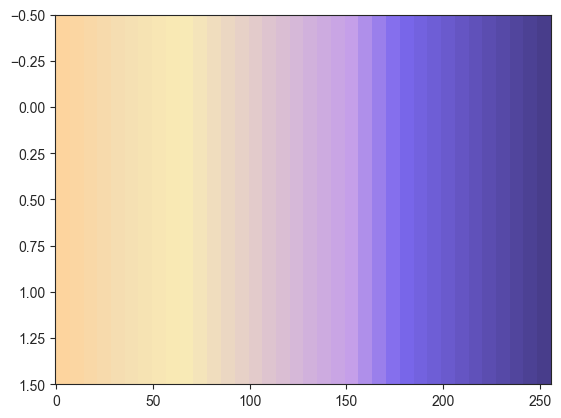

In [39]:
# create color map
ccolors = [(0, "#fdd49e"), (0.125, "wheat"), (0.25, "#faecb5"), (0.6, "#c59fe9"), (0.7, "mediumslateblue"),  (0.8, "slateblue"), (1, "darkslateblue")] # (0.5, "thistle"), (0.375, "lightyellow"),
col_cap = colors.LinearSegmentedColormap.from_list("", ccolors, N=len(df), gamma=1.0)
sns.set_palette(col_cap(np.linspace(0,1,col_cap.N)))



gradient = np.linspace(0.0, 1.0, 256)
gradient = np.vstack((gradient, gradient))

plt.imshow(gradient, aspect="auto", cmap=col_cap)
plt.show()

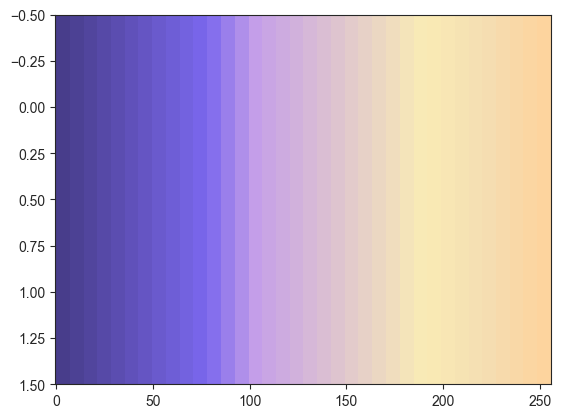

In [40]:
# create reversing colormap
col_cap_r = col_cap.reversed()
plt.imshow(gradient, aspect="auto", cmap=col_cap_r)
plt.show()

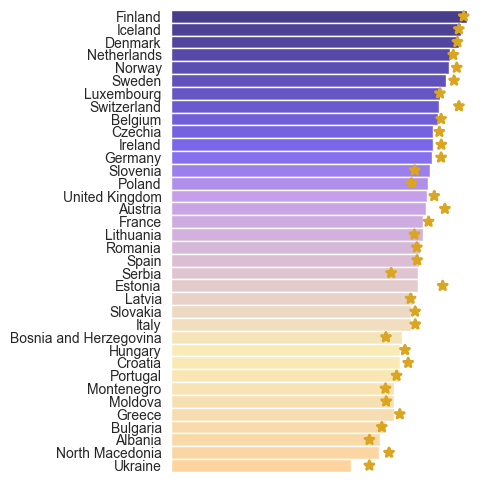

In [41]:
plt.figure(figsize=(4,6))
ax = sns.barplot(data=df.sort_values(by='life_ladder', ascending=False),
            x='life_ladder', 
            y='country_name',
            #order=europe_capstone['life_ladder'],
            palette=col_cap_r(np.linspace(0, 1, col_cap_r.N)),
            width=1.,
            saturation=1)

ax = sns.pointplot(data=df.sort_values(by='life_ladder', ascending=False),
            x='life_ladder_prediction', 
            y='country_name',
            #order=europe_capstone['life_ladder'],
            #color='darkorange',
            color='goldenrod',
            markers='*',
            linestyles='')
        
ax.set_xlabel("")
ax.set_ylabel("")

#ax.set_yticklabels(europe_capstone['country_name'], rotation = 45, ha="right")

ax.set(xticklabels=[]) # remove tick labels
ax.tick_params(bottom=False) #remove the ticks

#ax.set(yticklabels=[]) # remove tick labels
ax.tick_params(left=False) #remove the ticks

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False);